<a href="https://colab.research.google.com/github/caltunay/dd_competition_heart_disease/blob/master/10_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd 
import numpy as np

test_vals = '/content/drive/My Drive/Colab Notebooks/Data/Competition - DrivenData - Heart Disease Prediction/test_values (1).csv'

train_vals = '/content/drive/My Drive/Colab Notebooks/Data/Competition - DrivenData - Heart Disease Prediction/train_values (1).csv'
train_labs = '/content/drive/My Drive/Colab Notebooks/Data/Competition - DrivenData - Heart Disease Prediction/train_labels (1).csv'

In [0]:
submis_df = pd.read_csv(test_vals)

In [0]:
all = pd.merge(left = pd.read_csv(train_vals), right = pd.read_csv(train_labs), on = 'patient_id', how = 'inner')

In [0]:
# all.nunique()[all.nunique() != 2].sort_values()
all.nunique().sort_values()

fasting_blood_sugar_gt_120_mg_per_dl      2
sex                                       2
exercise_induced_angina                   2
heart_disease_present                     2
slope_of_peak_exercise_st_segment         3
thal                                      3
resting_ekg_results                       3
chest_pain_type                           4
num_major_vessels                         4
oldpeak_eq_st_depression                 34
resting_blood_pressure                   36
age                                      40
max_heart_rate_achieved                  73
serum_cholesterol_mg_per_dl             118
patient_id                              180
dtype: int64

In [0]:
cats = 'slope_of_peak_exercise_st_segment thal chest_pain_type num_major_vessels fasting_blood_sugar_gt_120_mg_per_dl resting_ekg_results sex exercise_induced_angina'.split()

cats

['slope_of_peak_exercise_st_segment',
 'thal',
 'chest_pain_type',
 'num_major_vessels',
 'fasting_blood_sugar_gt_120_mg_per_dl',
 'resting_ekg_results',
 'sex',
 'exercise_induced_angina']

In [0]:
cats.pop(cats.index('fasting_blood_sugar_gt_120_mg_per_dl'))
cats.pop(cats.index('exercise_induced_angina'))
cats.pop(cats.index('sex'))

cats

['slope_of_peak_exercise_st_segment',
 'thal',
 'chest_pain_type',
 'num_major_vessels',
 'resting_ekg_results']

In [0]:
all_dummied = pd.get_dummies(data = all, columns = cats, prefix_sep = '|', drop_first = True)

In [0]:
sub_dummied = pd.get_dummies(data = submis_df, columns = cats, prefix_sep = '|', drop_first = True)

In [0]:
cont_vals = all_dummied.nunique()[all_dummied.nunique() != 2].sort_values().index.tolist()
cont_vals.pop()

'patient_id'

In [0]:
all_dummied[cont_vals].describe()

,oldpeak_eq_st_depression,resting_blood_pressure,age,max_heart_rate_achieved,serum_cholesterol_mg_per_dl
count,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.010000,131.311111,54.811111,149.483333,249.211111
std,1.121357,17.010443,9.334737,22.063513,52.717969
min,0.000000,94.000000,29.000000,96.000000,126.000000
25%,0.000000,120.000000,48.000000,132.000000,213.750000
50%,0.800000,130.000000,55.000000,152.000000,245.500000
75%,1.600000,140.000000,62.000000,166.250000,281.250000
max,6.200000,180.000000,77.000000,202.000000,564.000000


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

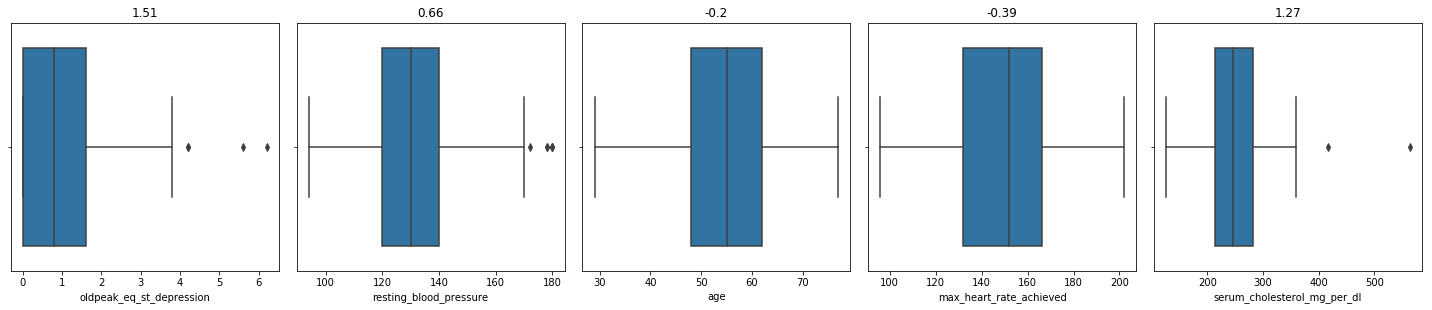

In [0]:
n = 1
m = 1 
plt.figure(figsize = (20,8))


for col in cont_vals:
#     plt.subplot(1,5,n)
#     sns.distplot(all_dummied[col])
#     plt.title(all_dummied[col].skew().round(2))
#     n+=1

    plt.subplot(2,5,m)
    sns.boxplot(all_dummied[col])
    plt.title(all_dummied[col].skew().round(2))
    m+=1

plt.tight_layout()
plt.show();

In [0]:
upper_oldpeak = all_dummied['oldpeak_eq_st_depression'].quantile(.95)
lower_oldpeak = all_dummied['oldpeak_eq_st_depression'].quantile(.05)

all_dummied['oldpeak_eq_st_depression'] = np.clip(all_dummied['oldpeak_eq_st_depression'], a_min = lower_oldpeak, a_max = upper_oldpeak)

In [0]:
sub_dummied['oldpeak_eq_st_depression'] = np.clip(sub_dummied['oldpeak_eq_st_depression'], a_min = lower_oldpeak, a_max = upper_oldpeak)

In [0]:
upper_resting = all_dummied['resting_blood_pressure'].quantile(.95)
lower_resting = all_dummied['resting_blood_pressure'].quantile(.05)

all_dummied['resting_blood_pressure'] = np.clip(all_dummied['resting_blood_pressure'], a_min = lower_resting, a_max = upper_resting)

In [0]:
sub_dummied['resting_blood_pressure'] = np.clip(sub_dummied['resting_blood_pressure'], a_min = lower_resting, a_max = upper_resting)

In [0]:
upper_serum = all_dummied['serum_cholesterol_mg_per_dl'].quantile(.95)
lower_serum = all_dummied['serum_cholesterol_mg_per_dl'].quantile(.05)

all_dummied['serum_cholesterol_mg_per_dl'] = np.clip(all_dummied['serum_cholesterol_mg_per_dl'], a_min = lower_serum, a_max = upper_serum)

In [0]:
sub_dummied['serum_cholesterol_mg_per_dl'] = np.clip(sub_dummied['serum_cholesterol_mg_per_dl'], a_min = lower_serum, a_max = upper_serum)

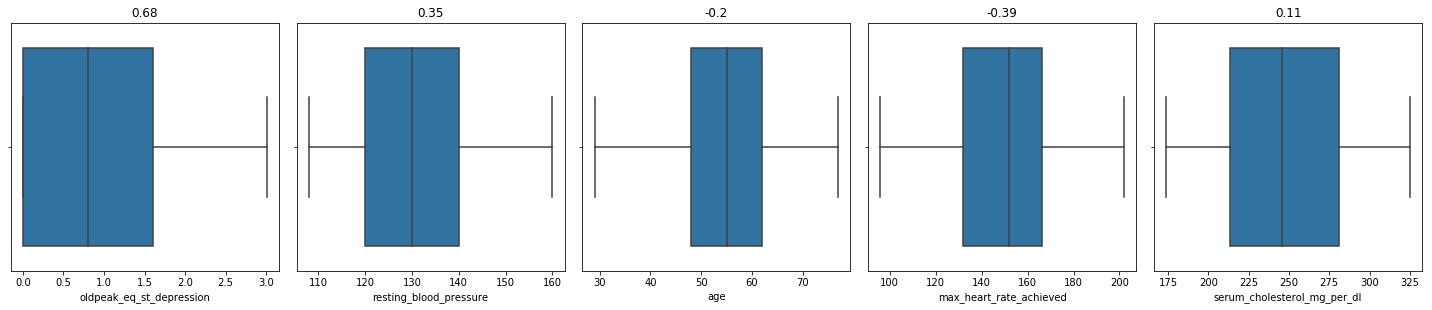

In [0]:
n = 1
m = 1 
plt.figure(figsize = (20,8))


for col in cont_vals:
#     plt.subplot(1,5,n)
#     sns.distplot(all_dummied[col])
#     plt.title(all_dummied[col].skew().round(2))
#     n+=1

    plt.subplot(2,5,m)
    sns.boxplot(all_dummied[col])
    plt.title(all_dummied[col].skew().round(2))
    m+=1

plt.tight_layout()
plt.show();


In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
sub_dummied.head()

,patient_id,resting_blood_pressure,fasting_blood_sugar_gt_120_mg_per_dl,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,slope_of_peak_exercise_st_segment|2,slope_of_peak_exercise_st_segment|3,thal|normal,thal|reversible_defect,chest_pain_type|2,chest_pain_type|3,chest_pain_type|4,num_major_vessels|1,num_major_vessels|2,num_major_vessels|3,resting_ekg_results|1,resting_ekg_results|2
0,olalu7,160,0,288.0,0.200,1,59,159,0,1,0,0,1,0,0,0,0,0,0,0,1
1,z9n6mx,138,0,183.0,1.400,0,35,182,0,0,0,1,0,0,0,1,0,0,0,0,0
2,5k4413,120,0,177.0,2.500,1,43,120,1,1,0,0,1,0,0,1,0,0,0,0,1
3,mrg7q5,108,0,318.0,0.000,0,60,160,0,0,0,1,0,0,1,0,1,0,0,0,0
4,uki4do,138,0,173.9,3.005,1,61,125,1,1,0,1,0,0,0,1,1,0,0,0,1


In [0]:
ssx = StandardScaler()

In [0]:
scaled_df = pd.DataFrame(ssx.fit_transform(all_dummied[cont_vals]), columns = cont_vals)
remainder_df = all_dummied.drop(labels = cont_vals, axis = 1)

df_clean = pd.concat([remainder_df,scaled_df], axis = 1)

In [0]:
sub_scaled_df = pd.DataFrame(ssx.transform(sub_dummied[cont_vals]), columns = cont_vals)
sub_remainder_df = sub_dummied.drop(labels = cont_vals, axis = 1)

sub_df_clean = pd.concat([sub_remainder_df,sub_scaled_df], axis = 1)

In [0]:
from imblearn.over_sampling import SMOTENC

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
x = df_clean.drop(labels = 'patient_id heart_disease_present'.split(), axis = 1)
y = df_clean[['heart_disease_present']]

In [0]:
sub_x = sub_df_clean.drop(labels = 'patient_id', axis = 1)

In [0]:
tt = 0

for tr, te in zip(x.columns.tolist(), sub_x.columns.tolist()):
    print(tr, '\t',te)
    if tr != te:
        tt += 1
        
tt

fasting_blood_sugar_gt_120_mg_per_dl 	 fasting_blood_sugar_gt_120_mg_per_dl
sex 	 sex
exercise_induced_angina 	 exercise_induced_angina
slope_of_peak_exercise_st_segment|2 	 slope_of_peak_exercise_st_segment|2
slope_of_peak_exercise_st_segment|3 	 slope_of_peak_exercise_st_segment|3
thal|normal 	 thal|normal
thal|reversible_defect 	 thal|reversible_defect
chest_pain_type|2 	 chest_pain_type|2
chest_pain_type|3 	 chest_pain_type|3
chest_pain_type|4 	 chest_pain_type|4
num_major_vessels|1 	 num_major_vessels|1
num_major_vessels|2 	 num_major_vessels|2
num_major_vessels|3 	 num_major_vessels|3
resting_ekg_results|1 	 resting_ekg_results|1
resting_ekg_results|2 	 resting_ekg_results|2
oldpeak_eq_st_depression 	 oldpeak_eq_st_depression
resting_blood_pressure 	 resting_blood_pressure
age 	 age
max_heart_rate_achieved 	 max_heart_rate_achieved
serum_cholesterol_mg_per_dl 	 serum_cholesterol_mg_per_dl


0

In [0]:
from sklearn.model_selection import train_test_split as tts

In [0]:
x_train, x_test, y_train, y_test = tts(x,y,random_state = 12, test_size = .22, stratify = y)

print(x_train.shape, x_test.shape,'\n',y_train.shape, y_test.shape)

(140, 20) (40, 20) 
 (140, 1) (40, 1)


In [0]:
y_test['heart_disease_present'].value_counts(normalize = True)

0    0.55
1    0.45
Name: heart_disease_present, dtype: float64

In [0]:
el = x_train.nunique().index.tolist()[:15]

In [0]:
list(range(0,15))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [0]:
smnc = SMOTENC(categorical_features = list(range(0,15)))

In [0]:
x_resampled, y_resampled = smnc.fit_resample(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
x_resampled.shape

(200, 20)

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.callbacks import EarlyStopping

from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import log_loss, classification_report, accuracy_score

In [0]:
kfold = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 42)

scores = []
stopper = EarlyStopping(monitor = 'val_acc', patience = 8)

for train, test in kfold.split(x_resampled, y_resampled):
    
    # create model
    model = Sequential()
    
    # add layers
    model.add(Dense(output_dim = 20, input_dim = 20, activation = 'relu'))
    model.add(BatchNormalization())
    
    model.add(Dense(output_dim = 20, activation = 'relu'))
    model.add(BatchNormalization())
    
    model.add(Dense(output_dim = 1, activation = 'sigmoid'))
    
    # compile model
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    # fit model
    model.fit(x_resampled[train], y_resampled[train], batch_size = 25, epochs = 1500, validation_data = (x_resampled[test], y_resampled[test]), callbacks = [stopper])
    
    # evaluate and add to list
    sc = accuracy_score(y_resampled[test], model.predict(x_resampled[test]).round())
    scores.append(sc)
    
print(scores)
print(np.mean(scores))
    

In [0]:
# print(classification_report(model.predict(x_resampled), y_resampled))
accuracy_score(y_resampled, model.predict(x_resampled).round())

0.83

In [0]:
def create_model(learning_rate = 0.01, activation='relu'):
    
    # set optimizer
    opt = Adam(lr=learning_rate)
  	
  	# Create your binary classification model  
    model = Sequential()
    
    model.add(Dense(10, input_dim=20, activation=activation))
    model.add(BatchNormalization())
    
    model.add(Dense(10, activation=activation))
    model.add(BatchNormalization())
    
    model.add(Dense(1, activation='sigmoid'))
  	
  	# Compile your model with your optimizer, loss, and metrics
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [0]:
# set optimizer
opt = Adam(lr=0.1)
  	
  	# Create your binary classification model  
model = Sequential()
    
model.add(Dense(10, input_dim=20, activation='relu'))
model.add(BatchNormalization())
    
model.add(Dense(10, activation='relu'))
model.add(BatchNormalization())
    
model.add(Dense(1, activation='sigmoid'))
  	
  	# Compile your model with your optimizer, loss, and metrics
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_resampled, y_resampled, batch_size = 5, epochs = 95)

Epoch 1/95
200/200 [==============================] - 18s 91ms/step - loss: 0.5670 - acc: 0.7550
Epoch 2/95
200/200 [==============================] - 0s 2ms/step - loss: 0.5316 - acc: 0.7550
Epoch 3/95
200/200 [==============================] - 0s 2ms/step - loss: 0.5592 - acc: 0.7450
Epoch 4/95
200/200 [==============================] - 0s 2ms/step - loss: 0.4507 - acc: 0.8000
Epoch 5/95
200/200 [==============================] - 0s 2ms/step - loss: 0.4183 - acc: 0.8300
Epoch 6/95
200/200 [==============================] - 0s 2ms/step - loss: 0.5213 - acc: 0.7850
Epoch 7/95
200/200 [==============================] - 0s 2ms/step - loss: 0.4412 - acc: 0.8000
Epoch 8/95
200/200 [==============================] - 0s 2ms/step - loss: 0.4900 - acc: 0.8150
Epoch 9/95
200/200 [==============================] - 0s 2ms/step - loss: 0.4373 - acc: 0.8300
Epoch 10/95
200/200 [==============================] - 0s 2ms/step - loss: 0.4707 - acc: 0.8050
Epoch 11/95
200/200 [==========================

In [0]:
wrapped_model = KerasClassifier(build_fn = create_model)

# hyperparameters
params = {'activation':['relu'], 
          'batch_size':[5],
          'epochs':[95], 
         'learning_rate':[.1]}


# Create a randomize search cv object and fit it on the data to obtain the results
random_search = RandomizedSearchCV(wrapped_model, param_distributions=params, cv=KFold(5))


random_search.fit(x_resampled,y_resampled)

# kfolds = cross_val_score(model, X, y, cv=3)

In [0]:
pd.concat([submis_df['patient_id'], pd.DataFrame(model.predict_proba(sub_x), columns = ['heart_disease_present'])], axis = 1).set_index('patient_id').to_csv('submis_df3.csv')

In [0]:
random_search.best_params_

{'activation': 'relu', 'batch_size': 5, 'epochs': 95, 'learning_rate': 0.1}

In [0]:
submis_df_dummies = pd.get_dummies(data = submis_df, columns = cats, prefix_sep = '|', drop_first = True)

In [0]:
all_dummied['chest_pain_type'].value_counts()

4    82
3    57
2    28
1    13
Name: chest_pain_type, dtype: int64

In [0]:
all_dummied.groupby('chest_pain_type').mean()['heart_disease_present']

chest_pain_type
1    0.307692
2    0.142857
3    0.228070
4    0.719512
Name: heart_disease_present, dtype: float64

In [0]:
all_dummied = pd.get_dummies(data = all_dummied, columns = ['chest_pain_type'], prefix_sep = '|', drop_first = True)

In [0]:
submis_df_dummies = pd.get_dummies(data = submis_df_dummies, columns = ['chest_pain_type'], prefix_sep = '|', drop_first = True)

In [0]:
to_normalize = all_dummied.drop(labels = ['patient_id', 'heart_disease_present'], axis = 1).nunique().sort_values(ascending = False).index[:5].tolist()

In [0]:
all_dummied[to_normalize].describe().T

,count,mean,std,min,25%,50%,75%,max
serum_cholesterol_mg_per_dl,180.0,249.211111,52.717969,126.0,213.75,245.5,281.25,564.0
max_heart_rate_achieved,180.0,149.483333,22.063513,96.0,132.00,152.0,166.25,202.0
age,180.0,54.811111,9.334737,29.0,48.00,55.0,62.00,77.0
resting_blood_pressure,180.0,131.311111,17.010443,94.0,120.00,130.0,140.00,180.0
oldpeak_eq_st_depression,180.0,1.010000,1.121357,0.0,0.00,0.8,1.60,6.2


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

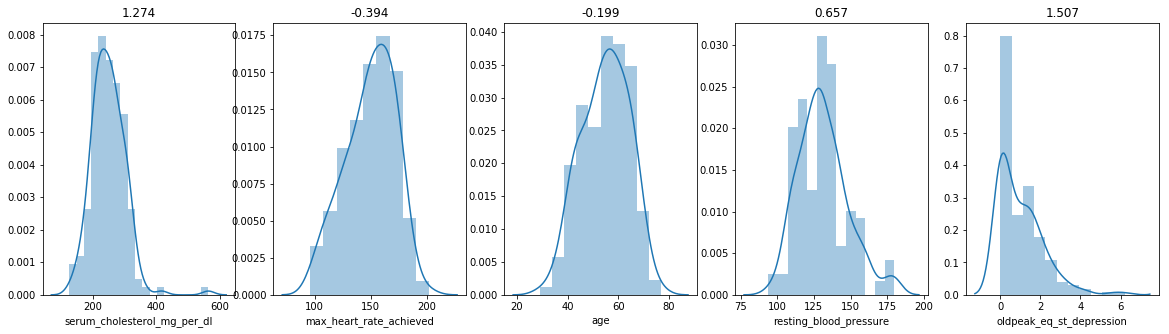

In [0]:
n = 1
plt.figure(figsize = (20,5))

for i in to_normalize:
    
    plt.subplot(1,5,n)
    sns.distplot(all_dummied[i])
    plt.title(all_dummied[i].skew().round(3))
    n+=1
    
    
    

In [0]:
from sklearn.preprocessing import Normalizer

In [0]:
# # Create normalizer
# norm = Normalizer(norm='l2')
# norm2 = Normalizer(norm='l2')

# all_dummied['test_depr'] = norm.transform(all_dummied[['oldpeak_eq_st_depression']])
# all_dummied['test_serum'] = norm2.transform(all_dummied[['serum_cholesterol_mg_per_dl']])

# all_dummied['test_serum']


all_dummied['oldpeak_eq_st_depression'] = np.log1p(all_dummied['oldpeak_eq_st_depression'])
all_dummied['serum_cholesterol_mg_per_dl'] = np.log1p(all_dummied['serum_cholesterol_mg_per_dl'])

In [0]:
submis_df_dummies

submis_df_dummies['oldpeak_eq_st_depression'] = np.log1p(submis_df_dummies['oldpeak_eq_st_depression'])
submis_df_dummies['serum_cholesterol_mg_per_dl'] = np.log1p(submis_df_dummies['serum_cholesterol_mg_per_dl'])

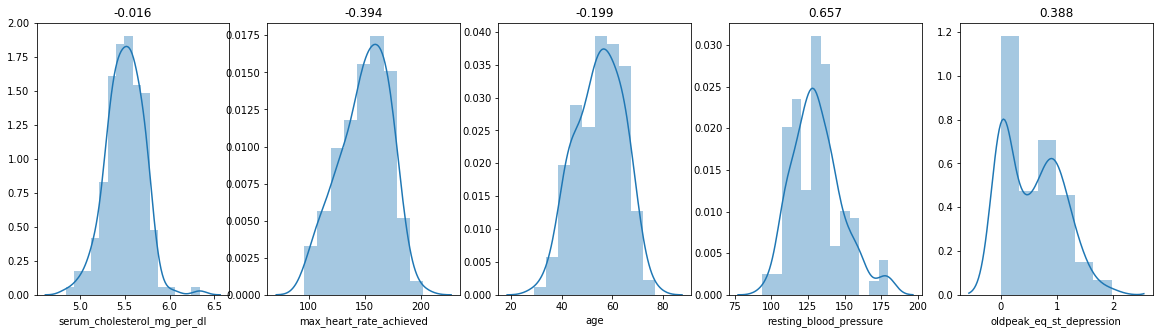

In [0]:
n = 1
plt.figure(figsize = (20,5))

for i in to_normalize:
    
    plt.subplot(1,5,n)
    sns.distplot(all_dummied[i])
    plt.title(all_dummied[i].skew().round(3))
    n+=1
    
    
    

In [0]:
all_dummied[to_normalize].nunique()

serum_cholesterol_mg_per_dl    118
max_heart_rate_achieved         73
age                             40
resting_blood_pressure          36
oldpeak_eq_st_depression        34
dtype: int64

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
ssx = StandardScaler()

df_scaled = pd.DataFrame(ssx.fit_transform(all_dummied[to_normalize]), columns = to_normalize)
df_remainder = all_dummied.drop(labels = to_normalize, axis = 1)
all_clean = pd.concat([df_remainder, df_scaled], axis = 1)

In [0]:
# ssx = StandardScaler()

# df_scaled = pd.DataFrame(ssx.fit_transform(all_dummied[to_normalize]), columns = to_normalize)
# df_remainder = all_dummied.drop(labels = to_normalize, axis = 1)
# all_clean = pd.concat([df_remainder, df_scaled], axis = 1)


submis_scaled_df = pd.DataFrame(ssx.transform(submis_df_dummies[to_normalize]), columns = to_normalize)

submis_remainder_df = submis_df_dummies.drop(labels = to_normalize, axis = 1)
submis_clean_df = pd.concat([submis_remainder_df, submis_scaled_df], axis = 1)

In [0]:
submis_clean_df.drop(labels = 'patient_id', axis =1).head()

,fasting_blood_sugar_gt_120_mg_per_dl,sex,exercise_induced_angina,slope_of_peak_exercise_st_segment|2,slope_of_peak_exercise_st_segment|3,thal|normal,thal|reversible_defect,num_major_vessels|1,num_major_vessels|2,num_major_vessels|3,resting_ekg_results|1,resting_ekg_results|2,chest_pain_type|2,chest_pain_type|3,chest_pain_type|4,serum_cholesterol_mg_per_dl,max_heart_rate_achieved,age,resting_blood_pressure,oldpeak_eq_st_depression
0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0.808379,0.432534,0.449994,2.280764,-0.754563
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,-1.402979,1.477887,-2.128220,0.394319,0.614527
2,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,-1.565356,-1.340021,-1.268815,-0.666806,1.359751
3,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1.292117,0.477984,0.557419,-1.727931,-1.114680
4,0,1,1,1,0,1,0,1,0,0,0,1,0,0,1,-1.877791,-1.112771,0.664845,0.394319,1.899554


In [0]:
all_clean.drop(labels = ['patient_id', 'heart_disease_present'], axis = 1).head()

,fasting_blood_sugar_gt_120_mg_per_dl,sex,exercise_induced_angina,slope_of_peak_exercise_st_segment|2,slope_of_peak_exercise_st_segment|3,thal|normal,thal|reversible_defect,num_major_vessels|1,num_major_vessels|2,num_major_vessels|3,resting_ekg_results|1,resting_ekg_results|2,chest_pain_type|2,chest_pain_type|3,chest_pain_type|4,serum_cholesterol_mg_per_dl,max_heart_rate_achieved,age,resting_blood_pressure,oldpeak_eq_st_depression
0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1.136120,0.932485,-1.053964,-0.195195,-1.114680
1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,-0.640365,0.387084,-0.087134,-1.256320,0.772626
2,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,1.072302,0.568884,2.383654,-0.372049,-1.114680
3,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,-0.439512,1.432436,-1.591092,1.219639,-1.114680
4,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0.493405,-0.203768,0.449994,2.752375,2.141716


In [0]:
for te, tr in zip(submis_clean_df.drop(labels = 'patient_id', axis =1).columns, all_clean.drop(labels = ['patient_id', 'heart_disease_present'], axis = 1).columns):
    print(tr, '\t', te)

fasting_blood_sugar_gt_120_mg_per_dl 	 fasting_blood_sugar_gt_120_mg_per_dl
sex 	 sex
exercise_induced_angina 	 exercise_induced_angina
slope_of_peak_exercise_st_segment|2 	 slope_of_peak_exercise_st_segment|2
slope_of_peak_exercise_st_segment|3 	 slope_of_peak_exercise_st_segment|3
thal|normal 	 thal|normal
thal|reversible_defect 	 thal|reversible_defect
num_major_vessels|1 	 num_major_vessels|1
num_major_vessels|2 	 num_major_vessels|2
num_major_vessels|3 	 num_major_vessels|3
resting_ekg_results|1 	 resting_ekg_results|1
resting_ekg_results|2 	 resting_ekg_results|2
chest_pain_type|2 	 chest_pain_type|2
chest_pain_type|3 	 chest_pain_type|3
chest_pain_type|4 	 chest_pain_type|4
serum_cholesterol_mg_per_dl 	 serum_cholesterol_mg_per_dl
max_heart_rate_achieved 	 max_heart_rate_achieved
age 	 age
resting_blood_pressure 	 resting_blood_pressure
oldpeak_eq_st_depression 	 oldpeak_eq_st_depression


In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import log_loss, classification_report

In [0]:
x = all_clean.drop(labels = ['patient_id', 'heart_disease_present'], axis = 1).values
y = all_clean['heart_disease_present'].values

In [0]:
submis_x = submis_clean_df.drop(labels = 'patient_id', axis = 1).values
submis_x

array([[ 0.        ,  1.        ,  0.        , ...,  0.44999378,
         2.28076406, -0.75456254],
       [ 0.        ,  0.        ,  0.        , ..., -2.12821993,
         0.39431935,  0.61452722],
       [ 0.        ,  1.        ,  1.        , ..., -1.26881536,
        -0.66680581,  1.35975086],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -1.37624093,
         0.98383332,  0.04630363],
       [ 0.        ,  0.        ,  1.        , ..., -0.94653865,
         0.39431935, -1.11468025],
       [ 0.        ,  1.        ,  0.        , ..., -1.26881536,
         1.10173612,  0.69515796]])

In [0]:
x.shape

(180, 20)

In [0]:
# fix random seed for reproducibility
seed = 42
np.random.seed(seed)


# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
log_l = []

for train, test in kfold.split(x, y): 
    
    # create model
    clf = Sequential()
    
    clf.add(Dense(output_dim = 12, input_dim = 20, activation = 'relu', init = 'uniform'))
#     clf.add(Dense(output_dim = 6, activation = 'relu', init = 'uniform'))
    clf.add(Dense(output_dim = 12, activation = 'relu', init = 'uniform'))
    clf.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    
    # Compile model
    clf.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'binary_crossentropy')

    # Fit the model
    clf.fit(x[train], y[train], epochs = 100, batch_size = 10, verbose = 0)
#     model.fit(X[train], Y[train], epochs=150, batch_size=13030, verbose=0)
	
    # evaluate the model
    scores = clf.evaluate(x[test], y[test], verbose=0)
    logl = log_loss(y[test], clf.predict_proba(x[test]))
	
    print("%s: %.2f%%" % (clf.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    
    log_l.append(logl * 100)

print('\n')
print('CV Scores are')
print(cvscores)    
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
print('\n')

print('Log Loss are')
print(log_l)
print("%.2f%% (+/- %.2f%%)" % (np.mean(log_l), np.std(log_l)))

In [0]:
# fix random seed for reproducibility
seed = 42
np.random.seed(seed)


# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=15, shuffle=True, random_state=seed)
cvscores = []
log_l = []

for train, test in kfold.split(x, y): 
    
    # create model
    clf = Sequential()
    
    clf.add(Dense(output_dim = 10, input_dim = 20, activation = 'relu'))
    clf.add(Dense(output_dim = 20, activation = 'relu'))
    clf.add(Dense(output_dim = 20, activation = 'relu'))
    clf.add(Dense(output_dim = 1, activation = 'sigmoid'))
    
    # Compile model
    clf.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'binary_crossentropy')

    # Fit the model
    clf.fit(x[train], y[train], epochs = 250, batch_size = 90, verbose = 0)
#     model.fit(X[train], Y[train], epochs=150, batch_size=13030, verbose=0)
	
    # evaluate the model
    scores = clf.evaluate(x[test], y[test], verbose=0)
    logl = log_loss(y[test], clf.predict_proba(x[test]))
	
    print("%s: %.2f%%" % (clf.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    
    log_l.append(logl * 100)
    
#     if logl > .10:
#         print('\n')
#         print('!!! loop broken !!!')
#         print('\n')
#         break

print('\n')
print('CV Scores are')
print(cvscores)    
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
print('\n')

print('Log Loss are')
print(log_l)
print("%.2f%% (+/- %.2f%%)" % (np.mean(log_l), np.std(log_l)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=20, activation="relu", units=10)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`


acc: 69.23%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=20, activation="relu", units=10)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`


acc: 92.31%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=20, activation="relu", units=10)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:2174: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:2174: Runtime

acc: 84.62%
acc: 76.92%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=20, activation="relu", units=10)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`


acc: 76.92%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=20, activation="relu", units=10)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`


acc: 58.33%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=20, activation="relu", units=10)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`


acc: 66.67%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=20, activation="relu", units=10)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`


acc: 83.33%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=20, activation="relu", units=10)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`


acc: 75.00%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=20, activation="relu", units=10)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`


acc: 75.00%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=20, activation="relu", units=10)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`


acc: 90.91%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=20, activation="relu", units=10)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`


acc: 54.55%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=20, activation="relu", units=10)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`


acc: 81.82%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=20, activation="relu", units=10)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:2174: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:2174: Runtime

acc: 63.64%
acc: 81.82%


CV Scores are
[69.2307710647583, 92.30769276618958, 84.61538553237915, 76.92307829856873, 76.92307829856873, 58.33333134651184, 66.66666865348816, 83.33333134651184, 75.0, 75.0, 90.90909361839294, 54.54545617103577, 81.81818127632141, 63.63636255264282, 81.81818127632141]
75.40% (+/- 10.77%)


Log Loss are
[88.16545873519317, 29.765165119673696, nan, 143.28599159443561, 150.75384299736226, 198.06204882164212, 113.81095619835833, 70.78886503422837, 73.69845045268448, 136.9316186263556, 14.514838967377067, 118.93107859767724, 27.35119793267751, nan, 52.416247107612435]
nan% (+/- nan%)


In [0]:
log_loss(y,clf.predict_proba(x))

0.1861456206067367

In [0]:
submis_pred = pd.DataFrame(clf.predict_proba(submis_x), columns = ['heart_disease_present'])
submis_final = pd.concat([submis_clean_df['patient_id'], submis_pred['heart_disease_present']], axis =1).set_index('patient_id')

submis_final.to_csv('submis2.csv')

In [0]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split as tts, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import log_loss, classification_report

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
gs.best_params_

{'lr__C': 0.0009,
 'lr__penalty': 'l1',
 'rfc__n_estimators': 7,
 'svm__C': 0.082,
 'svm__kernel': 'linear',
 'xgb__gamma': 0.00094,
 'xgb__learning_rate': 0.09,
 'xgb__n_estimators': 3}

In [0]:
voters = VotingClassifier(
    estimators = [
    ('svm', SVC(random_state = 42, probability = True)), 
    ('lr', LogisticRegression(random_state = 42)), 
    ('xgb', XGBClassifier(objective = 'binary:logistic')), 
    ('rfc', RandomForestClassifier())
    ], 
                         voting = 'soft')

params = {
    'lr__C':[.0009], 
         'lr__penalty':['l1'], 
         'svm__C':[.082], 
         'svm__kernel':['linear'],
         'rfc__n_estimators':[7], 
         'xgb__n_estimators':[3], 
         'xgb__learning_rate':[.09], 
         'xgb__gamma':[ .00094]
         }


gs = GridSearchCV(voters, 
                 param_grid = params, 
                 cv = 10, 
                 verbose = 3, 
                 n_jobs = -1)

gs.fit(x, y)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=VotingClassifier(estimators=[('svm',
                                                     SVC(C=1.0, cache_size=200,
                                                         class_weight=None,
                                                         coef0=0.0,
                                                         decision_function_shape='ovr',
                                                         degree=3,
                                                         gamma='auto_deprecated',
                                                         kernel='rbf',
                                                         max_iter=-1,
                                                         probability=True,
                                                         random_state=42,
                                                         shrinking=True,
                                                         tol=0.

In [0]:
submis_pred = pd.DataFrame(gs.predict_proba(submis_x), columns = ['heart_disease_present'])
submis_final = pd.concat([submis_clean_df['patient_id'], submis_pred['heart_disease_present']], axis =1).set_index('patient_id')

submis_final.to_csv('submis2.csv')

ValueError: ignored

In [0]:
pd.concat([submis_clean_df['patient_id'], pd.DataFrame(gs.predict_proba(submis_x)[:,1], columns = ['heart_disease_present'])], axis = 1).set_index('patient_id').to_csv('submis4.csv')